In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data_aprobados_colegio_barrio.csv', sep =';')
df

Curs                           Estudi  Codi àrea territorial  \
0      2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                    108   
1      2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                    108   
2      2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                    108   
3      2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                    108   
4      2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                    108   
...          ...                              ...                    ...   
11890  2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                   1260   
11891  2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                   1260   
11892  2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                   1260   
11893  2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                   1260   
11894  2023/2024  EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA                   1260   

                       Àrea territorial  Codi comarca     Comarca  \
0      CONSORCI D'EDUCACIÓ DE BARCELONA            13  BARCELONÈS   
1      CONSORCI D'EDUCACIÓ DE BARCELONA            13  BARCELONÈS   
2      CONSORCI D'EDUCACIÓ DE BARCELONA            13  BARCELONÈS   
3      CONSORCI D'EDUCACIÓ DE BARCELONA            13  BARCELONÈS   
4      CONSORCI D'EDUCACIÓ DE BARCELONA            13  BARCELONÈS   
...                                 ...           ...         ...   
11890                           PENEDÈS            17      GARRAF   
11891                           PENEDÈS            17      GARRAF   
11892                           PENEDÈS            17      GARRAF   
11893                           PENEDÈS            17      GARRAF   
11894                           PENEDÈS            17      GARRAF   

       Codi municipi              Municipi  Codi districte     Districte  \
0               8019             BARCELONA          801901  CIUTAT VELLA   
1               8019             BARCELONA          801901  CIUTAT VELLA   
2               8019             BARCELONA          801901  CIUTAT VELLA   
3               8019             BARCELONA          801901  CIUTAT VELLA   
4               8019             BARCELONA          801901  CIUTAT VELLA   
...              ...                   ...             ...           ...   
11890           8307  VILANOVA I LA GELTRÚ          830700           NaN   
11891           8307  VILANOVA I LA GELTRÚ          830700           NaN   
11892           8307  VILANOVA I LA GELTRÚ          830700           NaN   
11893           8307  VILANOVA I LA GELTRÚ          830700           NaN   
11894           8307  VILANOVA I LA GELTRÚ          830700           NaN   

      Naturalesa             Titularitat  Nivell  Sexe Concert  \
0         PRIVAT              FUNDACIONS       1  DONA      SI   
1         PRIVAT              FUNDACIONS       1  DONA      SI   
2         PRIVAT              FUNDACIONS       1  HOME      SI   
3         PRIVAT              FUNDACIONS       1  HOME      SI   
4         PRIVAT              FUNDACIONS       2  DONA      SI   
...          ...                     ...     ...   ...     ...   
11890     PÚBLIC  DEPARTAMENT D'EDUCACIÓ       4  DONA     NaN   
11891     PÚBLIC  DEPARTAMENT D'EDUCACIÓ       4  DONA     NaN   
11892     PÚBLIC  DEPARTAMENT D'EDUCACIÓ       4  HOME     NaN   
11893     PÚBLIC  DEPARTAMENT D'EDUCACIÓ       4  HOME     NaN   
11894     PÚBLIC  DEPARTAMENT D'EDUCACIÓ       4  HOME     NaN   

                         Resultat  Alumnes avaluats  
0        PROMOCIONEN AMB PENDENTS                 1  
1      PROMOCIONEN SENSE PENDENTS                13  
2        PROMOCIONEN AMB PENDENTS                 3  
3      PROMOCIONEN SENSE PENDENTS                14  
4        PROMOCIONEN AMB PENDENTS                 3  
...                           ...               ...  
11890    PROMOCIONEN AMB PENDENTS                70  
11891  PROMOCIONEN SENSE PENDENTS               169  
11892              NO PROMOCIONEN                61  
11893    PROMOCIONEN AMB

In [3]:
df_clean = df[["Sexe", "Resultat", "Alumnes avaluats"]]
df_clean

Sexe                    Resultat  Alumnes avaluats
0      DONA    PROMOCIONEN AMB PENDENTS                 1
1      DONA  PROMOCIONEN SENSE PENDENTS                13
2      HOME    PROMOCIONEN AMB PENDENTS                 3
3      HOME  PROMOCIONEN SENSE PENDENTS                14
4      DONA    PROMOCIONEN AMB PENDENTS                 3
...     ...                         ...               ...
11890  DONA    PROMOCIONEN AMB PENDENTS                70
11891  DONA  PROMOCIONEN SENSE PENDENTS               169
11892  HOME              NO PROMOCIONEN                61
11893  HOME    PROMOCIONEN AMB PENDENTS                78
11894  HOME  PROMOCIONEN SENSE PENDENTS               149

[11895 rows x 3 columns]

In [4]:


df['Categoria'] = np.select(
    [
        df['Resultat'].str.contains('PROMOCIONEN AMB PENDENTS'),
        df['Resultat'].str.contains('PROMOCIONEN SENSE PENDENTS'),
        df['Resultat'].str.contains('NO PROMOCIONEN')
    ],
    [
        'PROMOCIONA AMB PENDENTS',
        'PROMOCIONA SENSE PENDENTS',
        'NO PROMOCIONA'
    ],
    default='ALTRES'
)

resumen = (
    df.groupby(['Sexe', 'Categoria'])['Alumnes avaluats']
      .sum()
      .reset_index()
)

resumen


Sexe                  Categoria  Alumnes avaluats
0  DONA              NO PROMOCIONA              6525
1  DONA    PROMOCIONA AMB PENDENTS             37972
2  DONA  PROMOCIONA SENSE PENDENTS            120250
3  HOME              NO PROMOCIONA             11567
4  HOME    PROMOCIONA AMB PENDENTS             58113
5  HOME  PROMOCIONA SENSE PENDENTS            106981
6  NINF    PROMOCIONA AMB PENDENTS              1131
7  NINF  PROMOCIONA SENSE PENDENTS               506

<Figure size 600x400 with 0 Axes>

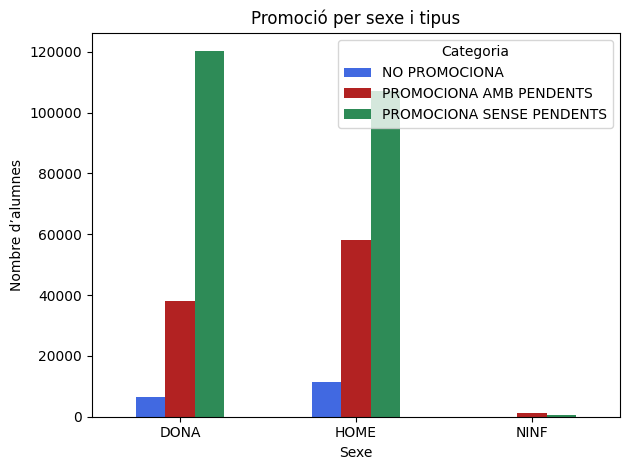

In [ ]:

tabla = resumen.pivot(index='Sexe',
                      columns='Categoria',
                      values='Alumnes avaluats')

plt.figure(figsize=(6,4))
tabla.plot(kind='bar', color=['royalblue', 'firebrick', 'seagreen'])

plt.xlabel('Sexe')
plt.ylabel('Nombre d’alumnes')
plt.title('Promoció per sexe i tipus')
plt.xticks(rotation=0)
plt.tight_layout()
bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


In [8]:
import folium as fm 
mapa = fm.Map(location=[41.3851, 2.1734], zoom_start=12)
mapa

In [ ]:
import json

import pandas as pd

import plotly.express as px

import plotly.io as pio

pio.renderers.default = "notebook"   # para VSCode/Jupyter

# 1. Cargar el geojson
with open("BARCELONA.geojson", encoding="utf-8") as f:
    geojson = json.load(f)

# 2. Crear un DataFrame “falso” solo para que Plotly tenga algo que mapear
ids = [feat["properties"]["COD_POSTAL"] for feat in geojson["features"]]
df = pd.DataFrame({
    "COD_POSTAL": ids,
    "dummy": 1           # mismo valor para todos
})

# 3. Mapa: todos del mismo color, solo para ver las áreas
fig = px.choropleth_mapbox(
    df,
    geojson=geojson,
    locations="COD_POSTAL",
    featureidkey="properties.COD_POSTAL",
    color="dummy",                       # valor ficticio
    center={"lat": 41.3851, "lon": 2.1734},
    zoom=10,
    mapbox_style="carto-positron",
    opacity=0.3                          # algo transparente
)

# Quitar barra de color y marcar contornos
fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.update_layout(
    margin={"r":0, "t":0, "l":0, "b":0},
    coloraxis_showscale=False
)

fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17288\3601034542.py:20: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

